In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/new_dataset.csv")
df.head(3)

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes


In [ ]:
df.isnull().sum()

,0
Outlook,0
Temp,0
Humidity,0
Windy,0
Play,0


In [ ]:



from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
df['Temp']=lb.fit_transform(df['Temp'])
df['Humidity']=lb.fit_transform(df['Humidity'])
df['Windy']=lb.fit_transform(df['Windy'])
df['Outlook']=lb.fit_transform(df['Outlook'])

In [ ]:
df.head(3)

,Outlook,Temp,Humidity,Windy,Play
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1


In [ ]:
x = df.drop(columns=['Play'], axis=1)
y = df['Play']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Use a classifier for categorical targets
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.6666666666666666

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("new_dataset.csv")   # use your file name


In [ ]:
X = df.drop("Play", axis=1)   # target column name
y = df["Play"]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
lb = LabelEncoder()

# Apply label encoding to categorical columns in x_train
for column in ['Outlook', 'Temp', 'Humidity', 'Windy']:
    if column in x_train.columns:
        x_train[column] = lb.fit_transform(x_train[column])

dt = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    random_state=42
)

dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

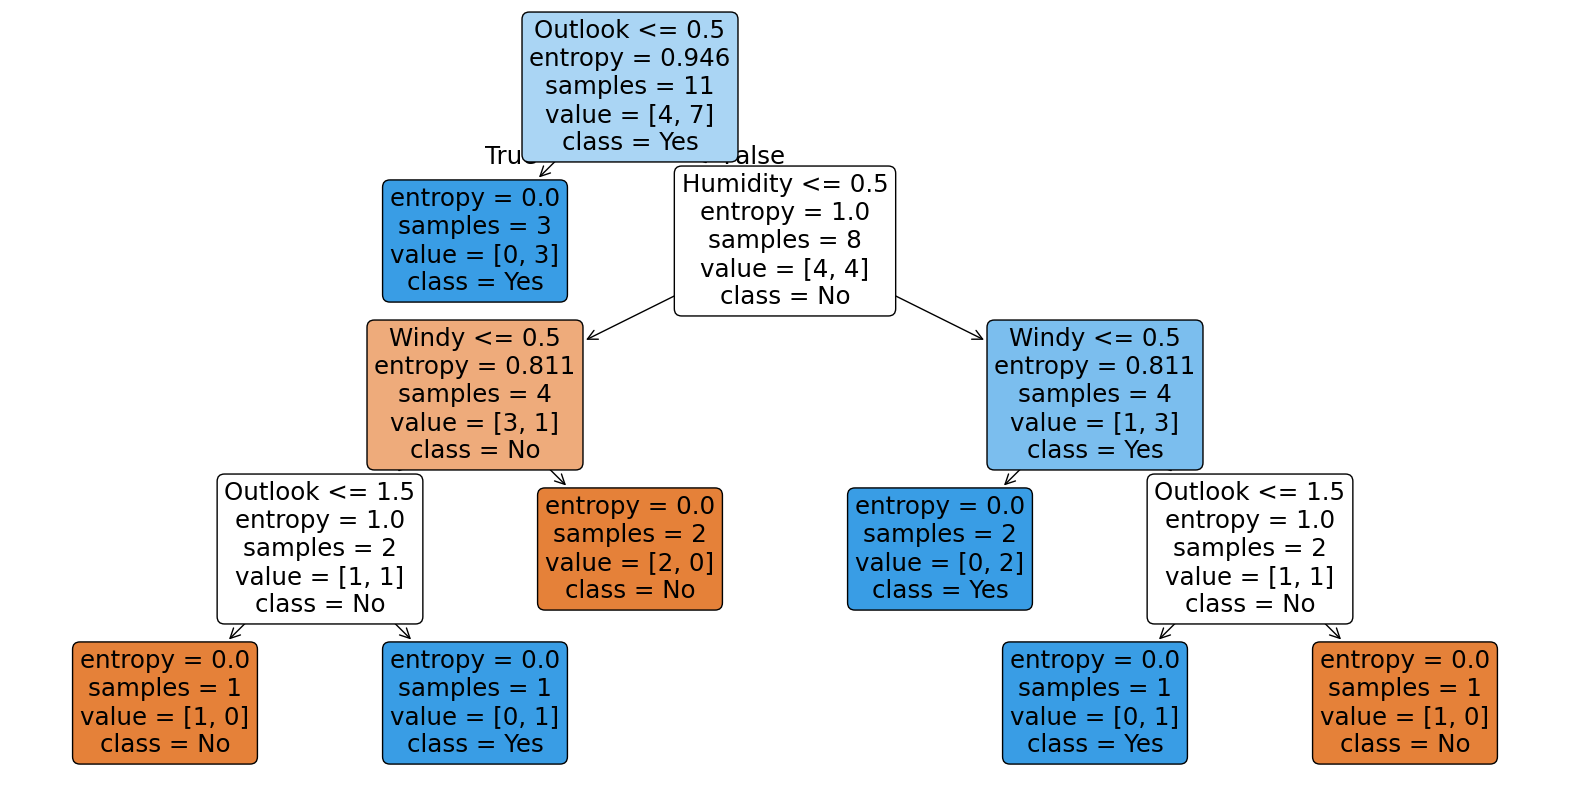

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True
)
plt.show()
